# DATA Analysis

The purpose of this Notebook is to perform the data Analysis, that is comparing the outputs generated from the previous notebooks for all the different samples. 



### Libraries

In [2]:

import numpy 
import math
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
from glob import glob
from functools import reduce
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import re


#%matplotlib notebook

# 1. Data import and merging 

## 1.1 XP-Ramp

In [19]:
spl = 'ASW'

In [3]:
XP_Ramp_df = pd.read_csv('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\XP_list_test.csv')
XP_Ramp_df_I = XP_Ramp_df.set_index('Date')

In [4]:
XP_Ramp_df_I.head(5)

,Sample,20K,30K,40K,50K,60K,70K,80K,90K,100K,...,137K,138K,140K,142K,145K,150K,155K,160K,180K,200K
Date,,,,,,,,,,,,,,,,,,,,,
2020_09_15,ASW,[1],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,[3],NaN,NaN,[4],NaN,NaN,NaN,NaN
2020_09_16,ASW,"[1, 2]",NaN,"[3, 4, 5]",NaN,"[6, 7, 8]",NaN,"[9, 10, 11]",NaN,"[12, 13, 14]",...,NaN,NaN,"[21, 22, 23]",NaN,NaN,"[24, 25, 26]",NaN,NaN,"[27, 28, 29]","[30, 31]"
2020_09_17,ASW,"[1, 2]",NaN,"[3, 4, 5]",NaN,"[6, 7, 8]",NaN,"[9, 10, 11]",NaN,"[12, 13, 14]",...,NaN,NaN,"[21, 22, 23]",NaN,NaN,"[24, 25, 26]",NaN,NaN,"[27, 28]",NaN
2020_09_21,ASW,"[1, 2]",NaN,"[3, 4, 5]",NaN,"[6, 7, 8]",NaN,"[9, 10, 11]",NaN,"[12, 13, 14]",...,NaN,NaN,"[21, 22, 23]",NaN,NaN,"[24, 25, 26]",NaN,NaN,"[27, 28]",NaN
2020_09_28,ASW,"[1, 2]","[3, 4, 5, 6]","[7, 8, 9, 10]","[11, 12, 13, 14]","[15, 16, 17, 18]","[19, 20, 21, 22]","[23, 24, 25, 26]","[27, 28, 29, 30]","[31, 32, 33, 34]",...,NaN,NaN,NaN,"[59, 60, 61, 62]","[63, 64, 65, 66]","[67, 68, 69, 70, 71, 72, 73, 74]","[75, 76, 77, 78]","[79, 80]",NaN,NaN


## 1.2  DR2 - DR3 all dates

 DR2 - DR3 are merged together

### 1.2.1 Import

In [5]:
# DR2

DR2_Allscans = glob("D:\PhD-WS\Projects\PAC\XP_1-1\DATA\*\Data\DR\DR2*All-scans.csv")

# DR3

DR3_Allscans = glob("D:\PhD-WS\Projects\PAC\XP_1-1\DATA\*\Data\DR\DR3*A.csv")

#### Sanity Check

In [6]:
DR2_Allscans
DR3_Allscans

['D:\\PhD-WS\\Projects\\PAC\\XP_1-1\\DATA\\2020_09_15\\Data\\DR\\DR3_2020_09_15_A.csv',
 'D:\\PhD-WS\\Projects\\PAC\\XP_1-1\\DATA\\2020_09_16\\Data\\DR\\DR3_2020_09_16_A.csv',
 'D:\\PhD-WS\\Projects\\PAC\\XP_1-1\\DATA\\2020_09_17\\Data\\DR\\DR3_2020_09_17_A.csv',
 'D:\\PhD-WS\\Projects\\PAC\\XP_1-1\\DATA\\2020_09_21\\Data\\DR\\DR3_2020_09_21_A.csv',
 'D:\\PhD-WS\\Projects\\PAC\\XP_1-1\\DATA\\2020_09_28\\Data\\DR\\DR3_2020_09_28_A.csv',
 'D:\\PhD-WS\\Projects\\PAC\\XP_1-1\\DATA\\2020_10_22\\Data\\DR\\DR3_2020_10_22_A.csv',
 'D:\\PhD-WS\\Projects\\PAC\\XP_1-1\\DATA\\2020_11_16\\Data\\DR\\DR3_2020_11_16_A.csv',
 'D:\\PhD-WS\\Projects\\PAC\\XP_1-1\\DATA\\2020_11_19\\Data\\DR\\DR3_2020_11_19_A.csv',
 'D:\\PhD-WS\\Projects\\PAC\\XP_1-1\\DATA\\2021_05_13\\Data\\DR\\DR3_2021_05_13_A.csv',
 'D:\\PhD-WS\\Projects\\PAC\\XP_1-1\\DATA\\2021_05_24\\Data\\DR\\DR3_2021_05_24_A.csv']

### 1.2.2 Merging

#### DR2

In [7]:
All_data_frame = []

for items in DR2_Allscans:

    df = pd.read_csv(items)
    df_1 = df.T.iloc[1:].T
    
    All_data_frame.append(df_1) 
    
    DR2_Allscans_full = reduce(lambda left,right: pd.merge(left,right, on=['Wavenumber'],how='outer'), All_data_frame)

In [8]:
DR2_Allscans_full


DR2_Allscans = glob("D:\PhD-WS\Projects\PAC\XP_1-1\DATA\*\Data\DR\DR2*All-scans.csv")

In [9]:
DR2_Allscans_full

,Wavenumber,ASW_2020_09_15_1,ASW_2020_09_15_2,ASW_2020_09_15_3,ASW_2020_09_15_4,ASW_2020_09_16_1,ASW_2020_09_16_2,ASW_2020_09_16_3,ASW_2020_09_16_4,ASW_2020_09_16_5,...,ASW_2021_05_24_483,ASW_2021_05_24_484,ASW_2021_05_24_485,ASW_2021_05_24_486,ASW_2021_05_24_487,ASW_2021_05_24_488,ASW_2021_05_24_489,ASW_2021_05_24_490,ASW_2021_05_24_491,ASW_2021_05_24_492
0,799.8442,0.060549,0.076188,0.071446,0.047759,0.061813,0.062677,0.070377,0.071031,0.073033,...,0.048800,0.048767,0.048408,0.049178,0.047778,0.051763,0.052555,0.055020,0.056034,0.061171
1,800.3264,0.059965,0.074772,0.075044,0.037780,0.059208,0.059777,0.064277,0.064086,0.066281,...,0.052965,0.053671,0.052923,0.054063,0.053984,0.055621,0.057292,0.059009,0.059942,0.066201
2,800.8085,0.059358,0.071323,0.077309,0.027005,0.056651,0.057048,0.058439,0.057722,0.059902,...,0.056586,0.057301,0.056603,0.057588,0.059036,0.058832,0.060971,0.062315,0.063480,0.070444
3,801.2906,0.059458,0.067423,0.074469,0.028824,0.056841,0.057890,0.060087,0.059701,0.061729,...,0.051400,0.051448,0.051381,0.052487,0.053773,0.053324,0.055295,0.055882,0.058406,0.063919
4,801.7727,0.059095,0.065795,0.072036,0.031592,0.057564,0.059094,0.061732,0.062012,0.063394,...,0.046206,0.046325,0.046060,0.047885,0.049168,0.048616,0.049703,0.050537,0.053893,0.058902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8680,3998.2570,0.000151,0.000688,0.000876,0.000556,0.000884,0.000916,0.000533,0.000411,0.000489,...,0.000525,0.000569,0.000513,0.000519,0.000521,0.000546,0.000569,0.000509,0.000523,0.000514
8681,3998.7390,0.000183,0.000399,0.000554,0.000626,0.000476,0.000507,0.000442,0.000392,0.000458,...,0.000346,0.000352,0.000322,0.000330,0.000345,0.000352,0.000361,0.000334,0.000336,0.000338
8682,3999.2210,0.000101,0.000000,0.000000,0.000436,0.000000,0.000000,0.000000,0.000039,0.000088,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8683,3999.7030,0.000105,0.000750,0.000746,0.000190,0.000703,0.000696,0.000560,0.000518,0.000532,...,0.000430,0.000447,0.000411,0.000422,0.000424,0.000413,0.000430,0.000414,0.000451,0.000435


$\color{red}{\text{Problem with Row number (should be 6639)!}}$


#### DR3

In [10]:
All_data_frame = []

#Wavenumber = 

for items in DR3_Allscans:

    df = pd.read_csv(items)
    df_1 = df.T.iloc[1:].T

    
    All_data_frame.append(df_1) 
    
    DR3_Allscans_full = reduce(lambda left,right: pd.merge(left,right, on=['Wavenumber'],how='outer'), All_data_frame)

In [11]:
DR3_Allscans_full

,Wavenumber,ASW_2020_09_15_1,ASW_2020_09_15_2,ASW_2020_09_15_3,ASW_2020_09_15_4,ASW_2020_09_16_1,ASW_2020_09_16_2,ASW_2020_09_16_3,ASW_2020_09_16_4,ASW_2020_09_16_5,...,ASW_2021_05_24_483,ASW_2021_05_24_484,ASW_2021_05_24_485,ASW_2021_05_24_486,ASW_2021_05_24_487,ASW_2021_05_24_488,ASW_2021_05_24_489,ASW_2021_05_24_490,ASW_2021_05_24_491,ASW_2021_05_24_492
0,2800.178,-0.000187,0.000075,0.000050,9.007620e-19,-0.000259,-0.000271,-0.000180,-0.000149,-0.000381,...,0.001902,0.001886,0.002011,0.001974,0.002030,0.001986,0.002007,0.001999,0.001988,0.002049
1,2800.660,-0.000137,0.000142,0.000364,3.145895e-04,-0.000121,-0.000137,0.000113,0.000146,-0.000087,...,0.001923,0.001913,0.002023,0.001998,0.002072,0.002012,0.002031,0.002028,0.002021,0.002084
2,2801.142,-0.000201,-0.000020,0.000000,9.304404e-05,-0.000172,-0.000191,-0.000143,-0.000134,-0.000362,...,0.001694,0.001681,0.001780,0.001765,0.001857,0.001786,0.001795,0.001800,0.001793,0.001862
3,2801.624,-0.000130,0.000175,0.000488,4.249901e-04,-0.000048,-0.000069,0.000192,0.000211,-0.000008,...,0.001712,0.001698,0.001792,0.001772,0.001878,0.001802,0.001806,0.001815,0.001802,0.001885
4,2802.106,-0.000186,0.000049,0.000172,2.575800e-04,-0.000066,-0.000087,-0.000006,-0.000010,-0.000224,...,0.001506,0.001496,0.001582,0.001565,0.001668,0.001592,0.001598,0.001605,0.001590,0.001689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485,3998.257,0.000156,0.000714,0.000909,5.772753e-04,0.000921,0.000955,0.000556,0.000428,0.000510,...,0.000549,0.000595,0.000536,0.000543,0.000545,0.000571,0.000595,0.000532,0.000547,0.000538
2486,3998.739,0.000190,0.000414,0.000575,6.505353e-04,0.000497,0.000529,0.000461,0.000409,0.000478,...,0.000362,0.000368,0.000337,0.000346,0.000361,0.000368,0.000378,0.000349,0.000352,0.000354
2487,3999.221,0.000105,0.000000,0.000000,4.531809e-04,0.000000,0.000000,0.000000,0.000040,0.000092,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2488,3999.703,0.000109,0.000779,0.000774,1.974239e-04,0.000733,0.000726,0.000584,0.000540,0.000554,...,0.000450,0.000468,0.000430,0.000442,0.000444,0.000432,0.000450,0.000433,0.000472,0.000455


## 1.3 Data_annex

In [12]:
data_anex = glob("D:\PhD-WS\Projects\PAC\XP_1-1\DATA\*\Data\DR\**_data_annex.csv")

### 1.2.2 Merging

# 2 Scans selection (Temperature - isotherms)

Using I python widget

[I python widget list](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)

[Widgets layout](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Styling.html)

## 2.1 Parameter list

In [13]:
Temp = XP_Ramp_df_I.columns[1:].values.tolist()
Date = XP_Ramp_df_I.index.values.tolist()
Sample = XP_Ramp_df_I['Sample'].values.tolist()  

## 2.2 Widget selection

the purpose of the widget is to select the data we want to plot using widget
- create list

Document:

[I python widget list](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)

In [14]:
#Create Dropdown Box Widget
wT = widgets.SelectMultiple(
    options= Temp,
    description='Temperature:',
    disabled=False,
)

wD = widgets.SelectMultiple(
    options= Date,
    description='Date',
    disabled=False,
)

wS = widgets.SelectMultiple(
    options= Sample,
    description='Sample',
    disabled=False,
)

widgets.HBox([wS,wD, wT])



#display(wT,wD,wS)

In [15]:
wT_L = list(wT.value)
wD_L = list(wD.value)

## Sanity Check

In [16]:
wT_L

['20K ', '40K', '60K', '80K']

In [17]:
wD_L

['2020_09_16', '2020_09_28']

## sample neme construction

use list value to extract scan number and produce file name

insert condition to supress first scan (ramp)

In [20]:
#date = ['2020_09_16','2020_09_17']
#temp = ['60K','80K']
#spl = 'ASW'

z = []
value_1 = []

for x in wD_L:
    for y in wT_L:

        value = XP_Ramp_df_I.loc[XP_Ramp_df_I.index == x, y].values[0]
        value_1 = re.findall(r"[-+]?\d*\.\d+|\d+", value)
    
        for items in value_1:
        
            to_plot = str('{}_{}_{}'.format(spl, x, items))
            z.append({
                
               'Name' : str(to_plot),
               'Temp' : y,
               'Date' : x, 
                
          
         
         })
             

In [21]:
z

[{'Name': 'ASW_2020_09_16_1', 'Temp': '20K ', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_2', 'Temp': '20K ', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_3', 'Temp': '40K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_4', 'Temp': '40K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_5', 'Temp': '40K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_6', 'Temp': '60K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_7', 'Temp': '60K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_8', 'Temp': '60K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_9', 'Temp': '80K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_10', 'Temp': '80K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_16_11', 'Temp': '80K', 'Date': '2020_09_16'},
 {'Name': 'ASW_2020_09_28_1', 'Temp': '20K ', 'Date': '2020_09_28'},
 {'Name': 'ASW_2020_09_28_2', 'Temp': '20K ', 'Date': '2020_09_28'},
 {'Name': 'ASW_2020_09_28_7', 'Temp': '40K', 'Date': '2020_09_28'},
 {'Name': 'ASW_2020_09_28_8', 'Temp': '40K

In [22]:
dat= pd.DataFrame(z)
data_df = dat.set_index('Name')

In [23]:
data_df

,Temp,Date
Name,,
ASW_2020_09_16_1,20K,2020_09_16
ASW_2020_09_16_2,20K,2020_09_16
ASW_2020_09_16_3,40K,2020_09_16
ASW_2020_09_16_4,40K,2020_09_16
ASW_2020_09_16_5,40K,2020_09_16
ASW_2020_09_16_6,60K,2020_09_16
ASW_2020_09_16_7,60K,2020_09_16
ASW_2020_09_16_8,60K,2020_09_16
ASW_2020_09_16_9,80K,2020_09_16


## 1.1.4 Plot pre-formating

### Temperature

Find a way to have a specific c=cmjet when we want to plot long isotherm data.

In [24]:
def Temp_color(row):
    if row['Temp'] == '20K ':
        return int(1)
    if row['Temp'] == '30K ':
        return int(2) 
    elif row['Temp'] == '40K':
        return int(3)
    elif row['Temp'] == '50K':
        return int(4)
    elif row['Temp'] == '60K':
        return int(5)
    elif row['Temp'] == '70K':
        return int(6)
    elif row['Temp'] == '80K':
        return int(7)
    elif row['Temp'] == '90K':
        return int(8)
    elif row['Temp'] == '100K':
        return int(9)
    elif row['Temp'] == '110K':
        return int(10)
    elif row['Temp'] == '120K':
        return int(11)
    elif row['Temp'] == '125K':
        return int(12)
    elif row['Temp'] == '130K':
        return int(13)
    elif row['Temp'] == '132K':
        return int(14)
    elif row['Temp'] == '134K':
        return int(15)
    elif row['Temp'] == '135K':
        return int(16)
    elif row['Temp'] == '136K':
        return int(17)
    elif row['Temp'] == '137K':
        return int(18)
    elif row['Temp'] == '138K':
        return int(19)
    elif row['Temp'] == '140K':
        return int(20)
    elif row['Temp'] == '145K':
        return int(21)
    elif row['Temp'] == '150K':
        return int(21)
    elif row['Temp'] == '155K':
        return int(22)
    elif row['Temp'] == '160K':
        return int(23)
    elif row['Temp'] == '180K':
        return int(24)
    elif row['Temp'] == '200K':
        return int(25)

In [25]:
data_df['Colour'] = data_df.apply (lambda row: Temp_color(row), axis=1)

In [26]:
data_df

,Temp,Date,Colour
Name,,,
ASW_2020_09_16_1,20K,2020_09_16,1
ASW_2020_09_16_2,20K,2020_09_16,1
ASW_2020_09_16_3,40K,2020_09_16,3
ASW_2020_09_16_4,40K,2020_09_16,3
ASW_2020_09_16_5,40K,2020_09_16,3
ASW_2020_09_16_6,60K,2020_09_16,5
ASW_2020_09_16_7,60K,2020_09_16,5
ASW_2020_09_16_8,60K,2020_09_16,5
ASW_2020_09_16_9,80K,2020_09_16,7


### Dates

[Cycler methodology](https://matplotlib.org/stable/tutorials/intermediate/color_cycle.html#sphx-glr-tutorials-intermediate-color-cycle-py)

For plotting

[Seaborn library](https://seaborn.pydata.org/)


### Could try Class attribute

What do we want to do:


Vocabulary:
- Method = function associated with a class
- Attributes = 

Class XP_Param is a blueprint to construct a list of sample that we want to plot based on the parameters enters with the widget.

One function should find within XP_Ramp_df_I the scan numbers associated with a peculiar date and temperature.
A second function should build a string with the format spl_date_scan number and append it into a list

differences between instance variables and class variables ?

# Plotting

Purpose here is to plot from DR2_all scan the scan present in dat using Temp and date in the legend and use the groupping for formatting

Find way to implement label with respect to dataframe value (input for color ?)

## 3 different DR

25


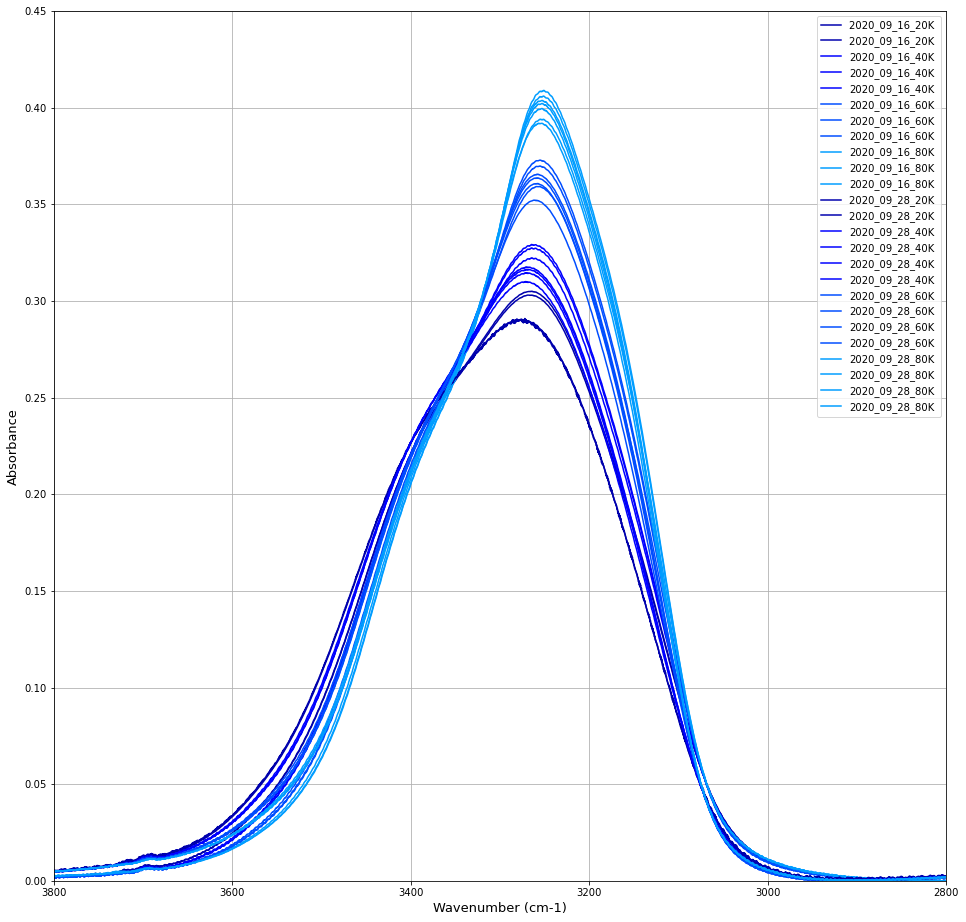

In [28]:
nscan = len(list(data_df['Date'].values.tolist()))

print(nscan)

fig, ax= plt.subplots(figsize=(16,16))

#colors = sns.color_palette("coolwarm", data_df.Temp.nunique())
#ax.set_prop_cycle('color', colors)

#ax.set_prop_cycle(color =['b', 'g'])
#cc = (cycler(linestyle=['-', '--', '-.']))

for i in dat['Name']:
    
#DR2
    
    #x = DR2_Allscans_full.Wavenumber
    #y = DR2_Allscans_full['{}'.format(i)]

#`DR3

    x = DR3_Allscans_full.Wavenumber
    y = DR3_Allscans_full['{}'.format(i)]
    
    plt.plot(x,y, label="{}_{}".format(str(data_df.loc[i]['Date']), str(data_df.loc[i]['Temp'])), c=cm.jet(int(data_df.loc[i]['Colour'])/25)) 


#plt.title('{0} DR1 '.format(date))
plt.axis([3800,2800,0,0.45])
plt.xlabel('Wavenumber (cm-1)').set_fontsize(13)
plt.ylabel('Absorbance').set_fontsize(13)
#ax = fig.gca()
plt.grid()
plt.legend()


#plt.savefig('D:\PhD-WS\Projects\PAC\XP_1-1\DATA\{0}\Plots\DR1\DR1_{0}_All_scans.png'.format(date))

plt.show()

### Max Absorbance

Import code from DR

### Other plotting

In [ ]:
# imports
%matplotlib inline

from ipywidgets import interactive
import pandas as pd
import numpy as np
# from jupyterthemes import jtplot

# Sample data
np.random.seed(123)
rows = 50
dfx = pd.DataFrame(np.random.randint(90,110,size=(rows, 1)), columns=['Variable X'])
dfy = pd.DataFrame(np.random.randint(25,68,size=(rows, 1)), columns=['Variable Y'])
dfz = pd.DataFrame(np.random.randint(60,70,size=(rows, 1)), columns=['Variable Z'])

df = pd.concat([dfx,dfy,dfz], axis = 1)
#jtplot.style()

import ipywidgets as widgets
from IPython.display import display

def multiplot(a):
    opts = df.columns.values
    df.loc[:, a].plot()

interactive_plot = interactive(multiplot, a=['Variable X', 'Variable Y', 'Variable Z'])
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

## Create class with widget input as variable 

Embed Naming function

[Youtube tutorial on classes](https://www.youtube.com/watch?v=ZDa-Z5JzLYM)

In [ ]:
class XP_Param:
    
    def found(self):
        print("input is" + self.column + self.row )
        return XP_Ramp_df_I.loc[self.row,self.column]
    

    

In [ ]:
T1 = XP_Param()
T1.column = "60K"
T1.row = "2020_09_21"


In [ ]:
T1.found()

## Name the desired sample

Purpose here is to create a function that create sample name based on previously selected parameters (date / Temperature)

### Documentation

[Interact function](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html#interactive)

In [ ]:
output_Date = wD.value

In [ ]:
# Define any function
def file_name(output_Date):
    return print(output_Date) 
    


### Plotting strategy

# Plotting

## Data from Data_Annex 

## Data from DR2

## Interactive Plotting

[I python widget list](https://kapernikov.com/ipywidgets-with-matplotlib/)



In [ ]:
x = numpy.linspace(0, 2 * numpy.pi, 100)
 
fig, ax = plt.subplots()
line, = ax.plot(x, numpy.sin(x))
ax.grid(True)
 
def update(change):
    line.set_ydata(numpy.sin(change.new * x))
    fig.canvas.draw()
     

int_slider = widgets.IntSlider(
    value=1, 
    min=0, max=10, step=1,
    description='$\omega$',
    continuous_update=False
)
int_slider.observe(update, 'value')
int_slider